In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
from networkx.algorithms.approximation import average_clustering
from thinkstats2 import Pmf, thinkplot, Cdf

# Exercise 4.1



In Section 4.8 of the book, two expanations for the small world phenomena were explored: "weak ties" and "hubs". We look into these two explanations and give a criticism on whether they are compatible with each other. 

In his paper "*Objectivity, Value Judgment, and Theory Choice*", Thomas Kuhn has presented a way of choosing among competing models. We consider his paper in comparing the two models.


**Solution:**

In the book, two competing models have been used to explain small-world phenomena in social networks. The Watts-Strogatz (WS) model suggests that social networks are small because they include both strongly-connected clusters and "weak ties" that connect these clusters. However, the Barabasi-Albert (BA) model suggests that social networks are small because they include nodes with high degree that act as hubs, and that hubs grow, over time, due to preferential attachment.

We can compare the two competing models using Kuhn's *Theory of Choice*. In his paper, "*Objectivity, Value Judgment, and Theory Choice*", Kuhn has given five characteristics of a good scientific theory, which are the following:

*    **Accuracy**, that is, the theory should be in agreement with the results of existing experiments and observations;
*    **Consistency**, that is, the theory must be consistent on itself and with other accepted theories;
*    **Broadness in Scope**, that is, the consequences of the theory should extend far beyond the particular observation laws;
*    **Simplicity**, that is, the theory must bring order to phenomena that in its absence would be individually isolated; and
*    **Fruitfulness**, that is, a theory should disclose new phenomena or previously unnoted relationships among those already known.

I believe these five criteria are sufficient in critiquing the two models we want to compare.

In terms of accuracy, each of the two models offer valid explanations on the phenomena. However, the issue of the WS model is that the predicted standard deviation of the degree distribution is much larger than that of the Facebook data set. This means that the heavy-tailed behavior of the Facebook data set is not observed in the WS model. On the other hand, the heavy-tail distribution is more apparent in the Barabasi-Albert model.

When we look at the average clustering $C$, the WS model predicts the average clustering more accurately of the Facebook data set than the BA model. Thus the small world phenomena can be predicted more accurately by the WS model than the BA model. 

In other words, the WS model is correct in the average clustering of the FB network but is not able to predict its heavy-tail distribution. On the other hand, the BA model is correct in the distribution being heavily-tailed but is too good to be a small world network. 

The two models are both simple in a way that they explain the behavior of the Facebook data set in the simplest way possible. 

To test which model is more plausible, we need to relate them with other more established theories. A possible route for this is that we need to know how people interact on social media. This means we should look at the sociology and psychology of social media communication. For the case of Facebook data, we need to look at how someone becomes friends with another user, or whether an individual already knows the person he wants to be online friends with. 

While we can get insight from analysis of the behavior of each individual, the challenge with this approach is that just like in any field of complexity science, "the whole is not simply the sum of its parts". Hence, the interaction of a group of individuals is much more important than the individual himself. That would be a limitation to the test between two competing models.

We also need to determine what factors affect this apparent small world behavior in social media networks. These parameters may modify the occurrence of this phenomena. By controlling these variables, we can look which model can be more accurate in explaining FB data set.

Since we want our theories to be broad in scope, we also need to check other sociological networks, without being limited to internet social networks. These data sets include the set of people who personally know each other, or even interactions among communicating animals. A good model must be applicable in as many physical situations as possible.

I believe that they are both fruitful since more research is devoted in understanding the behaviors of these networks, and the discipline is growing more than ever. Using these models two explain real-world phenomena is a good indication that the models have been useful in disclosing new relationships among already-known ideas. 

On a more personal note, I am more inclined to believe the Watts-Strogatz model since for ordinary people, it is more normal to have friends we know personally. Consequently, the distribution of the social media network becomes strongly connected clusters since mutual friends have more tendency to become friends.  

This does not mean however that they are incompatible with each other. The Barabasi-Albert model can also explain the evolution of these social networks. I want to look at the WS model as a "static model", whereas the BA model as a "dynamic model". The BA model explains how these hubs develop and grow. Preferential attachment can be seen in the way we choose our friends in social media. It is more probable to be friends with people we have mutual friends with we want to share some commonality with the friends we have. In general, people do not explore larger, more unfamiliar groups simply because we do not know much about these groups.

In conclusion, the two models are compatible since the WS model explain the Facebook data set in its current form, but the BA model gives a plausible explanation how we did arrive on the given distribution. We see the accuracy and simplicity of the to models, but we cannot deny the limitations to the correctness of the two models. The fruitfulness of the two models are apparent because the research on these models are still on-going, and hence more knowledge can still be gained based on these two models. Finally, more data must be obtained to establish the universality and consistency of each models, both in themselves, and in other more established theories.


# Exercise 4.2

NeworkX provides a function called ``powerlaw_cluster_graph`` that implements the *Holme and Kim algorithm for growing graphs with powerlaw degree distribution and approximate average clustering*. In this exercise, we try to generate a graph that has the same number of nodes as the Facebook dataset, the same average degree, and the same clustering coefficient. We also determine how does the degree distribution in the model compare to the actual distribution.

In the first two cells, we have checked the average clustering for a power cluster graph with th same number of nodes and average degree as the Facebook data set. We then plot the average clustering as a function of $p$ or the probability of rewiring an edge.

In [4]:
def read_graph(filename):
  G = nx.Graph()
  array = np.loadtxt(filename, dtype=int)
  G.add_edges_from(array)
  return G

fb = read_graph('facebook_combined.txt.gz')
n = len(fb)
m = len(fb.edges())
n, m

(4039, 88234)

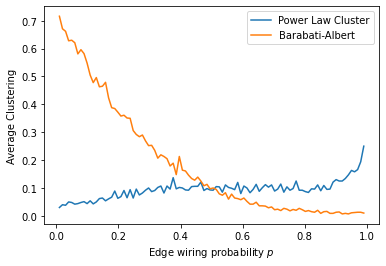

In [5]:
n_fb = len(fb)
k_fb = 22
k_ws = int(round(2*m/n))
p_fb = 1
p_ws = 0.051

pc = nx.powerlaw_cluster_graph(n_fb, k_fb, p_fb)
ws = nx.watts_strogatz_graph(n_fb, k_ws, p_ws)

def sample_path_lengths(G, nodes=None, trials=1000):
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair)
              for pair in pairs]
    return lengths

def estimate_path_lengths(G, nodes=None, trials=1000):
    return np.mean(sample_path_lengths(G, nodes, trials))

def degrees(G):
    return [G.degree(u) for u in G]

def pc_func(p_fb):
    return nx.powerlaw_cluster_graph(n_fb, k_fb, p_fb)

def ws_func(p_fb):
    return nx.watts_strogatz_graph(n_fb, k_ws, p_fb)

p_fb_array = np.linspace(0.01,0.99,num=100)

C_pc_values = []
for i in p_fb_array:
    some_entry = average_clustering(pc_func(i), trials=1000)
    C_pc_values.append(some_entry)
    
C_ws_values = []
for i in p_fb_array:
    some_entry = average_clustering(ws_func(i), trials=1000)
    C_ws_values.append(some_entry)



plt.plot(p_fb_array, C_pc_values)
plt.plot(p_fb_array, C_ws_values)
plt.legend(["Power Law Cluster", "Barabati-Albert", "Watts-Strogatz"])
plt.xlabel("Edge wiring probability $p$")
plt.ylabel("Average Clustering")
plt.show()

WS C Max:  0.638 , WS L Max:  3.201
PC C Max:  0.25438 , PC L Max:  2.734


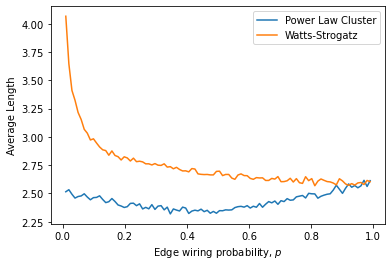

Maximum Average Clustering:  0.25438
Average Length:  2.734


In [6]:
C_max_ws = average_clustering(ws, trials=1000)
L_max_ws = estimate_path_lengths(ws)

C_max_pc = average_clustering(pc, trials=100000)
L_max_pc = estimate_path_lengths(pc)


print("WS C Max: ", C_max_ws,", WS L Max: ", L_max_ws)
print("PC C Max: ", C_max_pc,", PC L Max: ", L_max_pc)

L_pc_values = []
for i in p_fb_array:
    some_entry = estimate_path_lengths(pc_func(i))
    L_pc_values.append(some_entry)
    
L_ws_values = []
for i in p_fb_array:
    some_entry = estimate_path_lengths(ws_func(i))
    L_ws_values.append(some_entry)

    
L_ba_values = []
for i in p_fb_array:
    some_entry = estimate_path_lengths(ws_func(i))
    L_ba_values.append(some_entry)
    
plt.plot(p_fb_array, L_pc_values)
plt.plot(p_fb_array, L_ws_values)
plt.xlabel("Edge wiring probability, $p$")
plt.ylabel("Average Length")
plt.legend(["Power Law Cluster", "Watts-Strogatz"])
plt.show()

print("Maximum Average Clustering: ", C_max_pc)
print("Average Length: ", L_max_pc)

As we see here, the maximum average clustering of the Power Law cluster graph is much lower than that of the Watts-Strogatz model. Further, the average length of each cluster for the Power Law cluster graph is shorter than the Facebook model.

We then analyze the Probability Distribution Function (PDF) of the degrees of the distribution. This can be done by investigating the mean and the standard deviation of the distribution.

In [7]:
def degrees(G):
    return [G.degree(u) for u in G]

ba = nx.barabasi_albert_graph(n, k_fb)

pmf_fb = Pmf(degrees(fb))
print("Mean FB: ",pmf_fb.Mean(),", StDev FB: ", pmf_fb.Std())

pmf_ws = Pmf(degrees(ws))
print("Mean Watts-Strogatz: ",pmf_ws.Mean(),", StDev Watts-Strogatz: ", pmf_ws.Std())

pmf_ba = Pmf(degrees(ba))
print("Mean Barabasi-Albert: ",pmf_ba.Mean(),", StDev Barabasi-Albert: ", pmf_ba.Std())

pmf_pc = Pmf(degrees(pc))
print("Mean Power Law Cluster: ", pmf_pc.Mean(),", StDev Power Law Cluster: ", pmf_pc.Std())


Mean FB:  43.69101262688786 , StDev FB:  52.41411556737523
Mean Watts-Strogatz:  44.0 , StDev Watts-Strogatz:  1.4676506786302328
Mean Barabasi-Albert:  43.76033671700916 , StDev Barabasi-Albert:  40.70389578343839
Mean Power Law Cluster:  43.7568705125031 , StDev Power Law Cluster:  42.82844410404354


As we see here, the mean for Facebook data set, Watts-Strogatz graph and Power Cluster lie at the range 43.6-44.0. However, compared with the Watts-Strogatz graph, the Powerlaw Cluster Graph has a nearer standard deviation to the Facebook data set. 

We then plot the PDF as a function of number of degrees in a log-log scale. The plots are shown below.

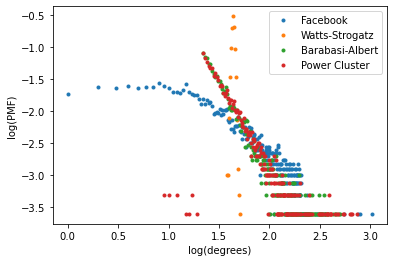

In [8]:
def log_pmf(u):
    log_value = []
    this_pmf = Pmf(degrees(u))
    for i in this_pmf:
        log_value.append(np.log10(this_pmf[i]))
    return log_value

def log_pmf_x(u):
    log_value = []
    this_pmf = Pmf(degrees(u))
    for i in this_pmf:
        log_value.append(np.log10(i))
    return log_value

plt.plot(log_pmf_x(fb),log_pmf(fb),'.')
plt.plot(log_pmf_x(ws),log_pmf(ws),'.')
plt.plot(log_pmf_x(ba),log_pmf(ba),'.')
plt.plot(log_pmf_x(pc),log_pmf(pc),'.')
plt.xlabel("log(degrees)")
plt.ylabel("log(PMF)")
plt.legend(["Facebook", "Watts-Strogatz", "Barabasi-Albert", "Power Cluster"])
plt.show()

In the plot, we see that both the Facebook data set and Power cluster graph are apprently heavily tailed. This is compared to the Watts-Strogatz distrbution which does not. 

Finally, we obtained the cumulative distribution function (CDF) of the Power Law Cluster distribution and compare it to the Facebook data set.

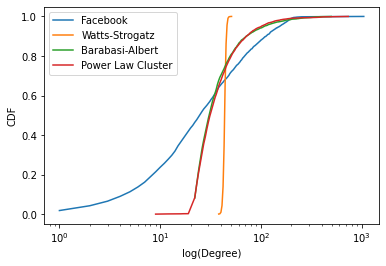

In [9]:
cdf_fb = Cdf(degrees(fb))
cdf_pc = Cdf(degrees(pc))
cdf_ws = Cdf(degrees(ws))

def cdf_x(u):
    return Cdf(degrees(u)).xs

def cdf_y(u):
    return Cdf(degrees(u)).ps


plt.plot(cdf_x(fb),cdf_y(fb))
plt.plot(cdf_x(ws),cdf_y(ws))
plt.plot(cdf_x(ba),cdf_y(ba))
plt.plot(cdf_x(pc),cdf_y(pc))
plt.xlabel("log(Degree)")
plt.ylabel("CDF")
plt.xscale('log')
plt.legend(["Facebook", "Watts-Strogatz", "Barabasi-Albert", "Power Law Cluster"])
plt.show()

Observe that the Power Law cluster distribution coincides with the Facebook data set for long tailed parts of the distribution. This means that for for higher CDF values, the Power Law Cluster can model the Facebook data set. Further, the Barabasi-Albert and Power Law cluster disrbitutions amlost coincide in all degree values. The main difference between the two is the low tail part, where the BA model suddenly stops. This is in contrast with the Watts-Strogatz plot which is inaccurate for these regions.

The following table summarizes the quantities we obtained at certain values of $p$:

| Parameters | Facebook Data | Watts-Strogatz | Barabasi-Albert | Power Law Cluster |
|---|---|---|---|---|
|Number of nodes | $n$ | $n$ | $n$ | $n$ |
|$k$| 22 | 44 | 22 | 22 |
|$C$| 0.61 | 0.63 | 0.037 | 0.256 |
|$L$| 3.69 | 3.23 | 2.51 | 2.75 |
|Mean degree| 43.7 | 44 | 43.7 | 43.7 |
|StDev degree| 52.4 | 1.5 | 40.1 | 44.0 |

# Exercise 4.3

In this exercise we consider the actor collaboration data used by Barabasi and Albert in their data. We analyze this actor network by computing the number of actors, the average degree, and by plotting the PMF and the CDF. 

The first cell reads the file and builds the graph. 

In [11]:
import gzip

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j:
                yield u, v

def read_actor_network(filename, n=None):
    G = nx.Graph()
    with gzip.open(filename) as f:
        for i, line in enumerate(f):
            nodes = [int(x) for x in line.split()]
            G.add_edges_from(all_pairs(nodes))
            if n and i>= n:
                break
    return G

actor = read_actor_network('actor.dat.gz')

n = len(actor)
m = len(actor.edges)

n, m

(382219, 15038094)

We then analyze the average clustering of the distribution. We can estimate the path lengths of the distribution for connected graphs.

Average Clustering is 0.7754


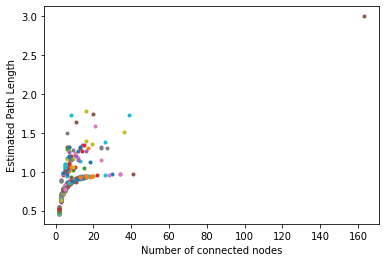

In [15]:
actor_ac = average_clustering(actor, trials=10000)
print("Average Clustering is", actor_ac)

for nodes in nx.connected_components(actor):
    if len(nodes)<10000:
        plt.plot(len(nodes), estimate_path_lengths(actor, nodes), '.')
        
plt.xlabel("Number of connected nodes")
plt.ylabel("Estimated Path Length")
plt.show()

Since there are some outlier graphs with a lot of nodes, we will then limit our analysis to a maximum of 100 connected nodes. The following is a graph of the distribution. We run the previous code, but this time we only consider until ``len(nodes)=100``:

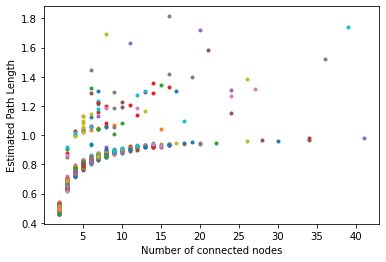

In [16]:
for nodes in nx.connected_components(actor):
    if len(nodes)<100:
        plt.plot(len(nodes), estimate_path_lengths(actor, nodes), '.')
        
plt.xlabel("Number of connected nodes")
plt.ylabel("Estimated Path Length")
plt.show()

Observe that for both large and small connected graphs, the largest path length is about 3.0. This means that the average path length is low. 

We then determine the average degree and standard deviation of the degree distribution.

In [17]:
print("Mean number of degrees:", np.mean(degrees(actor)))
print("Standard deviation: ", np.std(degrees(actor)))

Mean number of degrees: 78.68836452400325
Standard deviation:  163.32613818699565


From the data, the average number of degrees is about 78.7, and the standard deviation is 163.3.

We then plot the probability distribution function (PDF) for actor data to check whether it a heavily-tailed distribution or not. We will be using the ``log_pmf_x`` and ``log_pmf`` functions in the previous exercise. Recall that

~~~python
def log_pmf(u):
    log_value = []
    this_pmf = Pmf(degrees(u))
    for i in this_pmf:
        log_value.append(np.log10(this_pmf[i]))
    return log_value

def log_pmf_x(u):
    log_value = []
    this_pmf = Pmf(degrees(u))
    for i in this_pmf:
        log_value.append(np.log10(i))
    return log_value
~~~

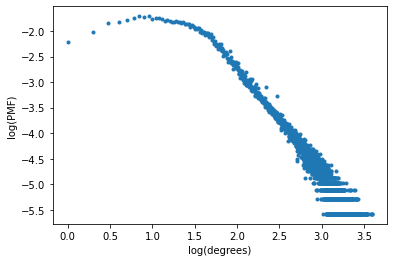

In [18]:
plt.plot(log_pmf_x(actor),log_pmf(actor),'.')
plt.xlabel("log(degrees)")
plt.ylabel("log(PMF)")
plt.show()

The almost straight line distribution at larger values of the ``log(degrees)`` suggests that the ``actor`` distribution is a heavily-tailed distribution. This can be more observed from the cumulative distribution function (CDF) and complementary cumulative distribution function (CCDF), shown below.  

For the CDF, we will be using the functions ``cdf_x`` and ``cdf_y``, which were defined in the previous exercise:

~~~python
def cdf_x(u):
    return Cdf(degrees(u)).xs

def cdf_y(u):
    return Cdf(degrees(u)).ps
~~~

Then we plotted the CDF for which the $x$ axis is on a log scale. 

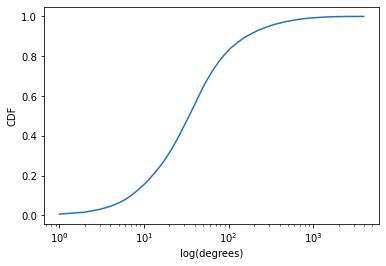

In [20]:
cdf_actor = Cdf(degrees(actor))

plt.plot(cdf_x(actor), cdf_y(actor))
plt.xscale('log')
plt.xlabel('log(degrees)')
plt.ylabel('CDF')
plt.show()

For the CCDF, we will be using the ``thinkplot.cdf`` function from the ``ThinkStats`` module. We set the ``complement=True`` so the plot gives the CCDF instead of the CDF. The code and the plot is shown below:

No handles with labels found to put in legend.


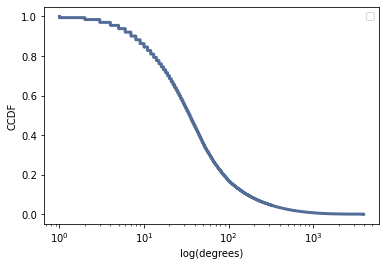

<Figure size 576x432 with 0 Axes>

In [22]:
thinkplot.cdf(cdf_actor, complement=True)
thinkplot.show(xlabel='log(degrees)', ylabel='CCDF',xscale='log',legend='CCDF')

In both the CDF and the CCDF, the curve is almost flat at the range where the ``log(degrees`` is relatively large. This suggests that the distribution is heavily-tailed. 